In [5]:
#Install all dependencies library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from datetime import datetime
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error


In [6]:
#Read JSON File to convert to Dataframe

with open('data-sample.json') as f:
    data_sample = json.load(f)

df = pd.json_normalize(data_sample, max_level=5)

df.head(5)

,taskCreatedTime,taskAssignedTo,taskCompletedTime,taskStatus,flow,taskId,taskLocationDone.lon,taskLocationDone.lat,cod.amount,cod.received,UserVar.branch_dest,UserVar.taskStatusLabel,UserVar.receiver_city,UserVar.taskDetailStatusLabel,UserVar.taskDetailStatus,UserVar.weight,UserVar.branch_origin,UserVar.taskStatus
0,2022-11-01 20:17:26 +0700,pacifiedLion0,2022-11-01 20:46:30 +0700,done,Delivery,4fe3b237c832ca4841a2,109.762910,-6.926608,685000.0,True,SRG,Success,"BATANG ,KAB BATANG",YANG BERSANGKUTAN,D01,13,CGK,COLF01
1,2022-11-01 08:41:07 +0700,peacefulTacos6,2022-11-01 12:33:48 +0700,done,Delivery,08a4da25256affae8446,110.033986,-7.876154,53500.0,True,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,1.3,CGK,COLF01
2,2022-11-01 08:41:07 +0700,peacefulTacos6,2022-11-01 13:41:57 +0700,done,Delivery,2ff0dc469826158b7684,109.999733,-7.849777,179500.0,True,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,3,CGK,COLF01
3,2022-11-01 08:41:07 +0700,peacefulTacos6,2022-11-01 18:18:19 +0700,done,Delivery,331c172c2b383f774328,110.003708,-7.710998,31815.0,True,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,0.625,CGK,COLF01
4,2022-11-01 08:41:07 +0700,peacefulTacos6,2022-11-01 10:51:49 +0700,done,Delivery,a9d53fa96c80baee8b23,110.013887,-7.829742,144562.0,True,MGL,Success,"BAGELEN,PURWOREJO",YANG BERSANGKUTAN,D01,3,CGK,COLF01


In [7]:
df.describe()

,taskLocationDone.lon,taskLocationDone.lat,cod.amount
count,7566.000000,7566.000000,2.358000e+03
mean,75.355852,-3.610514,1.911411e+05
std,52.492016,3.647171,2.723770e+05
min,0.000000,-10.493658,8.370000e+02
25%,0.000000,-7.061575,6.100000e+04
50%,106.843097,-3.329263,1.533750e+05
75%,112.182877,0.000000,2.350000e+05
max,140.806424,5.564040,4.730000e+06


In [8]:
df.isna().sum()

taskCreatedTime                     0
taskAssignedTo                      1
taskCompletedTime                 768
taskStatus                          0
flow                                0
taskId                              0
taskLocationDone.lon              768
taskLocationDone.lat              768
cod.amount                       5976
cod.received                     5976
UserVar.branch_dest                 0
UserVar.taskStatusLabel           762
UserVar.receiver_city              52
UserVar.taskDetailStatusLabel     762
UserVar.taskDetailStatus          762
UserVar.weight                      0
UserVar.branch_origin             293
UserVar.taskStatus                762
dtype: int64

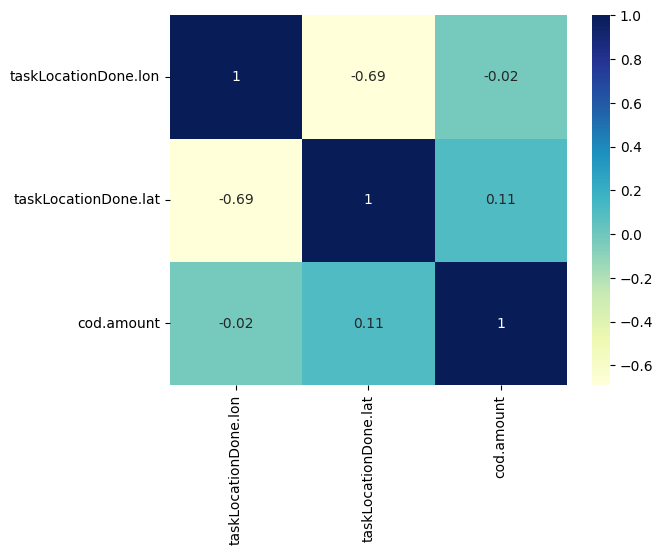

In [9]:
#Correlation heatmap for delivery task
corr_matrix = sns.heatmap(df.corr(numeric_only=True), cmap='YlGnBu', annot=True)
plt.show()

In [10]:
#Delete NaN value from dataframe to clean data

df.dropna(axis=0, inplace=True)
df.head(5)

,taskCreatedTime,taskAssignedTo,taskCompletedTime,taskStatus,flow,taskId,taskLocationDone.lon,taskLocationDone.lat,cod.amount,cod.received,UserVar.branch_dest,UserVar.taskStatusLabel,UserVar.receiver_city,UserVar.taskDetailStatusLabel,UserVar.taskDetailStatus,UserVar.weight,UserVar.branch_origin,UserVar.taskStatus
0,2022-11-01 20:17:26 +0700,pacifiedLion0,2022-11-01 20:46:30 +0700,done,Delivery,4fe3b237c832ca4841a2,109.762910,-6.926608,685000.0,True,SRG,Success,"BATANG ,KAB BATANG",YANG BERSANGKUTAN,D01,13,CGK,COLF01
1,2022-11-01 08:41:07 +0700,peacefulTacos6,2022-11-01 12:33:48 +0700,done,Delivery,08a4da25256affae8446,110.033986,-7.876154,53500.0,True,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,1.3,CGK,COLF01
2,2022-11-01 08:41:07 +0700,peacefulTacos6,2022-11-01 13:41:57 +0700,done,Delivery,2ff0dc469826158b7684,109.999733,-7.849777,179500.0,True,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,3,CGK,COLF01
3,2022-11-01 08:41:07 +0700,peacefulTacos6,2022-11-01 18:18:19 +0700,done,Delivery,331c172c2b383f774328,110.003708,-7.710998,31815.0,True,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,0.625,CGK,COLF01
4,2022-11-01 08:41:07 +0700,peacefulTacos6,2022-11-01 10:51:49 +0700,done,Delivery,a9d53fa96c80baee8b23,110.013887,-7.829742,144562.0,True,MGL,Success,"BAGELEN,PURWOREJO",YANG BERSANGKUTAN,D01,3,CGK,COLF01


In [11]:
df.isna().sum()

taskCreatedTime                  0
taskAssignedTo                   0
taskCompletedTime                0
taskStatus                       0
flow                             0
taskId                           0
taskLocationDone.lon             0
taskLocationDone.lat             0
cod.amount                       0
cod.received                     0
UserVar.branch_dest              0
UserVar.taskStatusLabel          0
UserVar.receiver_city            0
UserVar.taskDetailStatusLabel    0
UserVar.taskDetailStatus         0
UserVar.weight                   0
UserVar.branch_origin            0
UserVar.taskStatus               0
dtype: int64

In [12]:
df.columns

Index(['taskCreatedTime', 'taskAssignedTo', 'taskCompletedTime', 'taskStatus',
       'flow', 'taskId', 'taskLocationDone.lon', 'taskLocationDone.lat',
       'cod.amount', 'cod.received', 'UserVar.branch_dest',
       'UserVar.taskStatusLabel', 'UserVar.receiver_city',
       'UserVar.taskDetailStatusLabel', 'UserVar.taskDetailStatus',
       'UserVar.weight', 'UserVar.branch_origin', 'UserVar.taskStatus'],
      dtype='object')

(np.float64(0.2233241427067026),
 np.float64(106.21134391259082),
 1.936276441250051e-05,
 115.92119091250757)

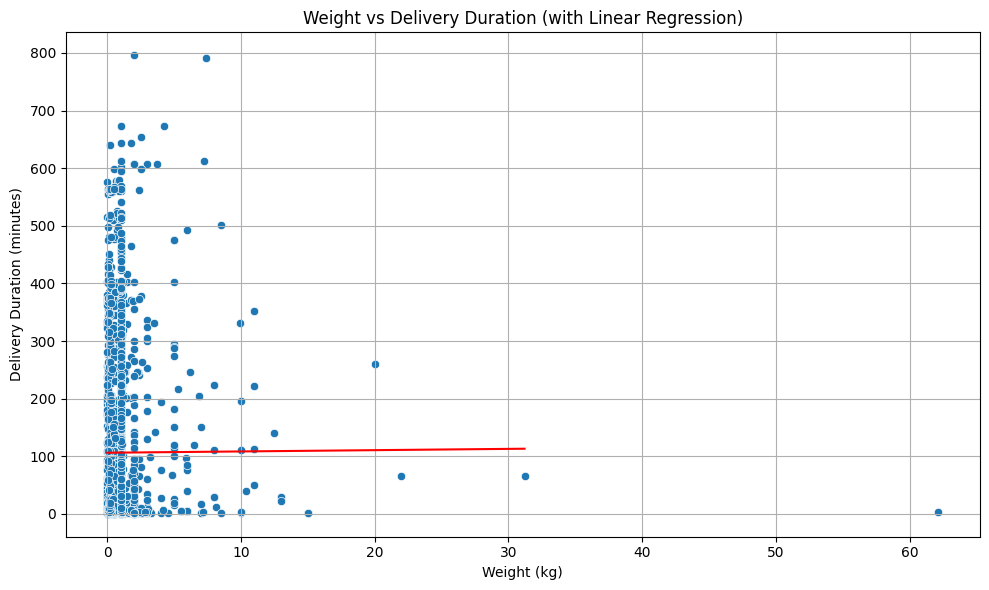

In [16]:
# Convert 'taskCompletedTime' to datetime again with correct timezone handling
df['taskCompletedTime'] = pd.to_datetime(df['taskCompletedTime'], errors='coerce', utc=True).dt.tz_convert('Asia/Jakarta')

# Also convert 'taskCreatedTime' to the same timezone for consistency
df['taskCreatedTime'] = pd.to_datetime(df['taskCreatedTime'], errors='coerce', utc=True).dt.tz_convert('Asia/Jakarta')

# Recalculate delivery duration
df['delivery_duration_minutes'] = (df['taskCompletedTime'] - df['taskCreatedTime']).dt.total_seconds() / 60

# Re-run ML preparation
df['weight'] = pd.to_numeric(df['UserVar.weight'], errors='coerce')
X = df[['weight']]
y = df['delivery_duration_minutes']

# Model training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)

# Metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(x='weight', y='delivery_duration_minutes', data=features)
sns.lineplot(x=X_test['weight'], y=y_pred, color='red')
plt.title("Weight vs Delivery Duration (with Linear Regression)")
plt.xlabel("Weight (kg)")
plt.ylabel("Delivery Duration (minutes)")
plt.grid(True)
plt.tight_layout()

model.coef_[0], model.intercept_, r2, mae
